Hypothesis: The top 3 factories(various) that affect the house sale prices are
total Rooms above ground(TotalRAG), 
Ground living area(GrLivArea) and 
Overall quality(OverallQual)
Source: https://www.kaggle.com/c/house-prices-advanced-regression-techniques

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Getting Data
df=pd.read_csv('house price.csv')

In [3]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Data cleaning
First, take a look at the missing rate of each feature. As we can be seen from the table below, the missing rate of PoolQC, MiscFeature, Alley and Fence is particularly high, and fireplacenta has reached about half. It can be consider removing these features when preprocessing.

In [4]:
#View missing value of columns
df.isnull().any().sum()

19

In [5]:
#Checking for NaN
N=pd.concat([df.dtypes,df.isnull().sum(),df.isnull().sum()/df.shape[0]], 
                 axis=1,keys=['dtype','total','percentage'])
N_sort=N.sort_values(['percentage'],axis=0,ascending=False)
#Print the NaN count greater than zero
N_sort.head(20)

,dtype,total,percentage
PoolQC,object,1453,0.995205
MiscFeature,object,1406,0.963014
Alley,object,1369,0.937671
Fence,object,1179,0.807534
FireplaceQu,object,690,0.472603
LotFrontage,float64,259,0.177397
GarageYrBlt,float64,81,0.055479
GarageCond,object,81,0.055479
GarageType,object,81,0.055479
GarageFinish,object,81,0.055479


In [6]:
#Remove top 5 high fault rate data
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis=1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,Reg,Lvl,AllPub,Corner,...,0,0,0,0,0,1,2008,WD,Normal,118000


Analyze target variables
The target variable is continuous and has no special outlier (0 or negative). 
There is no invalid or other non-numeric data.

In [7]:
#Summary of descriptive statistics of sale price
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

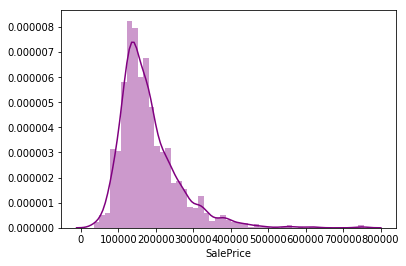

In [8]:
#Target visualization
_=sns.distplot(df['SalePrice'],color='purple')

Selecting the 3 features from hypothesis related to the target variable SalePrice.
For continuous variables, the Pearson correlation coefficient can be used to find the features relevant to the target variables.Pearson correlation coefficient is a statistic describing the degree of linear correlation between two continuous variables. Its value range is [-1,+1].

For numerical type, we are more concerned with the relationship and distribution between each feature and the target variable. The scatter diagram can be adopted to visually check outliers.

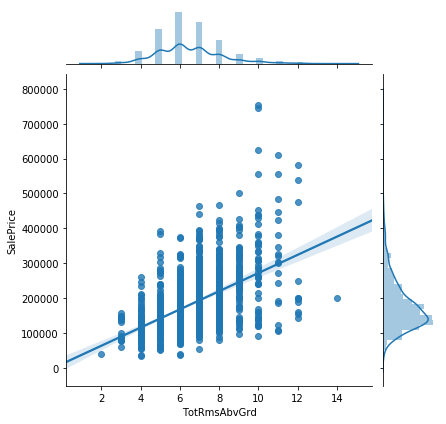

In [9]:
#TotRmsAbvGrd
df2=df
j=sns.jointplot("TotRmsAbvGrd","SalePrice",data=df2,kind="reg")

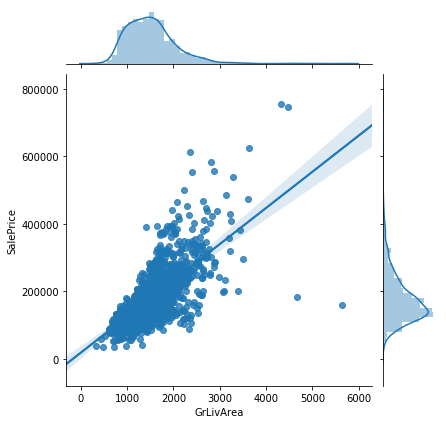

In [10]:
#GrLivArea
df3=df
j=sns.jointplot(x="GrLivArea",y="SalePrice",data=df3,kind="reg")

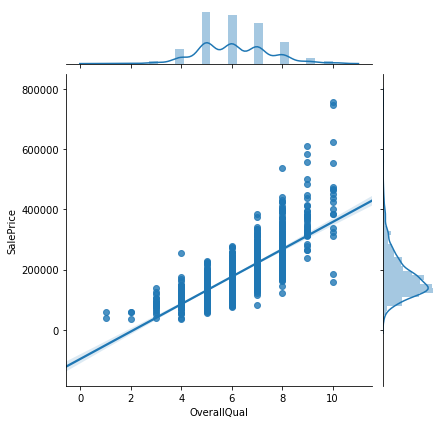

In [11]:
#OverallQual
df4=df
j=sns.jointplot(x="OverallQual",y="SalePrice",data=df4,kind="reg")

Using a method for systematic analysis of the correlation between each features and the target variables. 
Analyzing the overall features (numerical data) of the data set to find the best result.
Calculating the correlation coefficient by using .corr(), and then show the heatmap with correlation.

In [12]:
#Get numeric columns for visualization
numeric_columns=df.dtypes[df.dtypes!='object'].index

Correlation matrix visualization use color and value to represent the correlation between any two elements. 
The lighter the color, the stronger the correlation, vice versa.

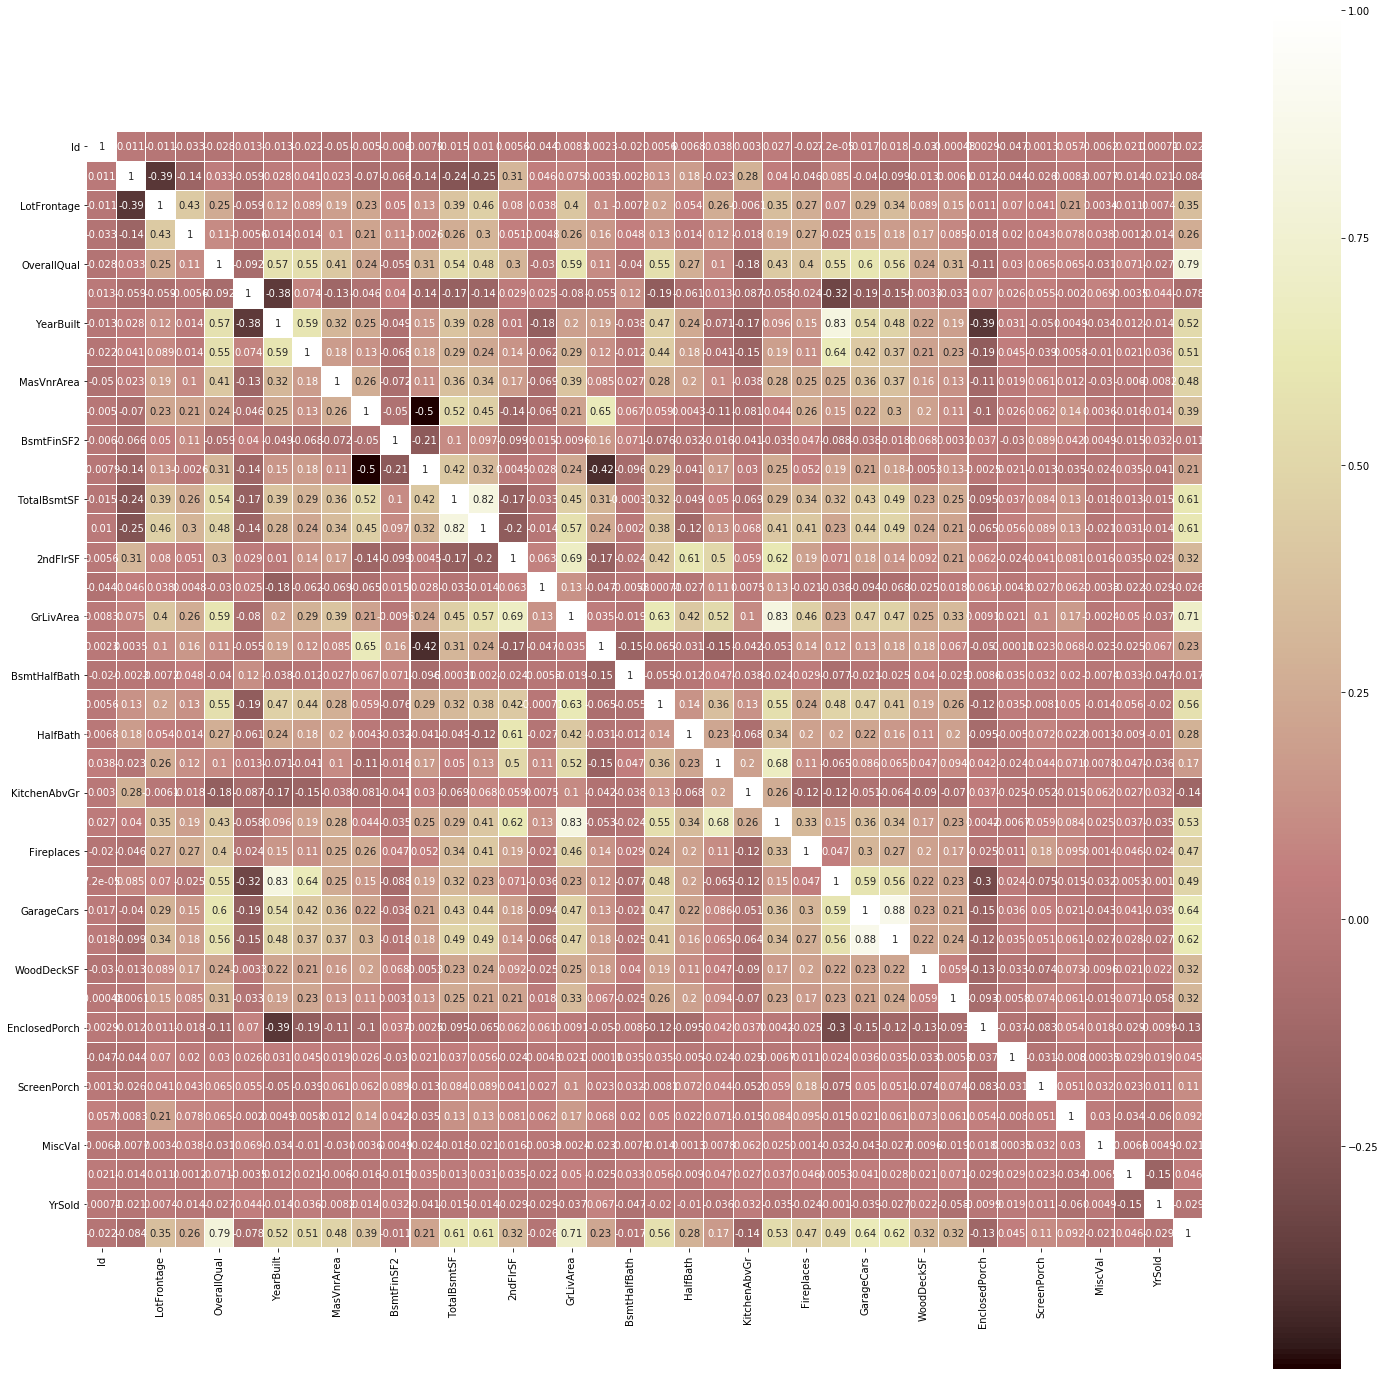

In [13]:
#Correlation matrix
df1=df
corrmat=df1[numeric_columns].corr()
hm=sns.heatmap(corrmat,vmax=1,linewidths=0.01,square=True,annot=True,linecolor='white',cmap='pink')
hm.figure.set_size_inches(25,25)

Select the pearson correlation coefficients features of the top 10 features

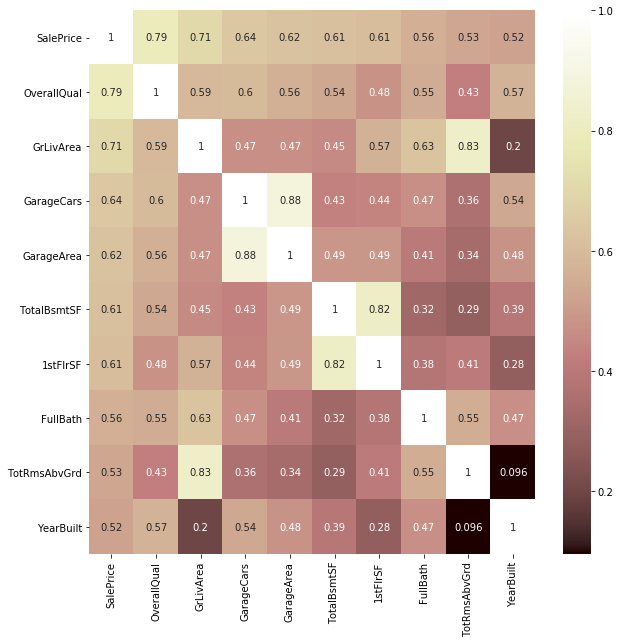

In [14]:
#Saleprice correlation matrix 
k=10
cl=corrmat.nlargest(k,'SalePrice')['SalePrice'].index
cm=np.corrcoef(df[cl].values.T)
hm=sns.heatmap(cm,cbar=True,annot=True,cmap='pink',annot_kws={'size': 10},yticklabels=cl.values,xticklabels=cl.values)
hm.figure.set_size_inches(10,10)

The correlation between two identical elements is 1, such as saleprice and saleprice. We can see from the figure that the correlation between garagecars and garagearea is 0.88, indicating the two elements are highly correlated. We can take one element characteristic, similar to totalbsmtSF and 1stFlrSF(0.82).
Just keep 'GarageCars' and 'TotalBsmtSF'.

'OverallQual'(0.79) and 'GrLivArea'(0.71) are strongly correlated with 'SalePrice'.
'GarageCars'(0.64) and 'TotalBsmtSF'(0.61) are moderate positive correlation.

Conclusion:
The result of hypothesis of pearson correlation coefficient:
'TotRmsAbvGrd'(0.53), 
'GrLivArea'(0.71),
'OverallQual'(0.79).
The result of top 3 of pearson correlation coefficient:
'OverallQual'(0.79), 
'GrLivArea'(0.71) ,
'GarageCars'(0.64).
The hypothesis are too close with the result of actual data analysis, due to the continuous variable has positive correlations with sale price.
Lesson Learned:
It is time-consuming and tedious to analyze individual features with target variables one by one. Using heatmap to analyze the correlation between the characteristics and the target variables is claer and easier.
Need to improve:
Considering the model is overfitting ot not and dealt with data outliers.